In [2]:
"""
Variation quantum eigensolver: 
solve for ground-state energy of molecule efficiently
"""

"""
Quantum support vector machine:
classify sets of data base on features
"""

'\nQuantum support vector machine:\nclassify sets of data base on features\n'

In [3]:
##FOURIER CHECKING CIRUIT##

In [4]:
import qiskit.quantum_info as qi
from qiskit.circuit.library import FourierChecking#FC
from qiskit.visualization import plot_histogram

In [5]:
##Two functions: nothing but lists
f=[1,-1,-1,-1]
g=[1,1,-1,-1]
#FC tells how correlated fourier transform of g is to f


In [6]:
circ=FourierChecking(f=f,g=g)
circ.draw()

┌──────────────────────────────────────┐
q_0: ┤0                                     ├
     │  fc: [1, -1, -1, -1], [1, 1, -1, -1] │
q_1: ┤1                                     ├
     └──────────────────────────────────────┘

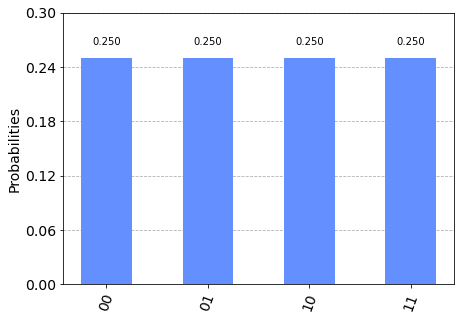

In [10]:
zero=qi.Statevector.from_label('00')
sv=zero.evolve(circ)
probs=sv.probabilities_dict()
plot_histogram(probs) #if prob>0.05 ==> f,g are correlated      here we look for p(0,0)

In [11]:
"""
Grovers algo
"""

'\nGrovers algo\n'

In [14]:
my_list=[1,3,5,2,7,9,1,3,0,4,6,8]#unsorted list and we want to locate a 'w'=7 (say)
def oracle(my_input): #classical oracle===> return true if input is winner
    winner=0
    if my_input is winner:
        res=True
    else:
        res=False
    return res

for ind,num in enumerate(my_list):
    if oracle(num):
        print("Winner found at %i"%ind)
        print("#Calls %i"%(ind+1))
        break
###We see that in worst case O(N) call N=len(my_list)
###with quantum we can make it O(N^0.5) 


Winner found at 8
#Calls 9


In [20]:
"""
For grover: 
oracle==> flip the sign of input if input is the winner 
eg: for 2-qubit {00,01,10,11}  suppose (11) is winner

=> (1,1)->oracle->(-1,1)

using reflection and controlled-z gate

reflection also for amplitude amplification
Grover's diffusion operator=>combination of reflection+oracle

"""

"\nFor grover: \noracle==> flip the sign of input if input is the winner \neg: for 2-qubit {00,01,10,11}  suppose (11) is winner\n\n=> (1,1)->oracle->(-1,1)\n\nusing reflection and controlled-z gate\n\nreflection also for amplitude amplification\nGrover's diffusion operator=>combination of reflection+oracle\n\n"

In [21]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np


In [22]:
#oracle circuit
oracleQ=QuantumCircuit(2,name='oracle')
oracleQ.cz(0,1)
oracleQ.to_gate()
oracleQ.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [26]:
#check oracle doing correct
#using a statevector simulator
backend=Aer.get_backend('statevector_simulator')
grover_circ=QuantumCircuit(2,2)
grover_circ.h([0,1])#create superposition state s
grover_circ.append(oracleQ,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [31]:
job=execute(grover_circ,backend)
result=job.result()

sv=result.get_statevector()
np.around(sv,2)
##Now use reflection to reduce amplitude/prob of non-winning state and increase prob of winning state

"""

we have |w> winning state 
and |s> state (superposition)
w, s arent orthogonal

we can construct |t> such that w,t are orthogonal and s,t are not

then plug |s> in oracle==>cause reflection about|t>==>project (|s><s|-1)==> move to wector closer to |w>

repetedly apply==>amplitude max closer tow winner
"""

reflection=QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [35]:
backend=Aer.get_backend('qasm_simulator')
grover_circ=QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracleQ,[0,1])
grover_circ.append(reflection,[0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [37]:
job=execute(grover_circ,backend,shots=1)
result=job.result()
result.get_counts()##used 1 O(N^0.5)

{'11': 1}

In [40]:
####Grovers algo to find constraint-optimisation by using search on all possibilities such that constraint held
#boolean-satisfiability problem  ====> grover's search 
#encode in boolean kind of expresssion ::    (A and B) or (C and D) and not(A and D)


In [42]:
from qiskit import BasicAer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.tools.visualization import plot_histogram


In [43]:
log_expr='((A & B) | (C & D)) & ~(B & D)'#logical expression

In [44]:
algo=Grover(LogicalExpressionOracle(log_expr))
backend=BasicAer.get_backend('qasm_simulator')

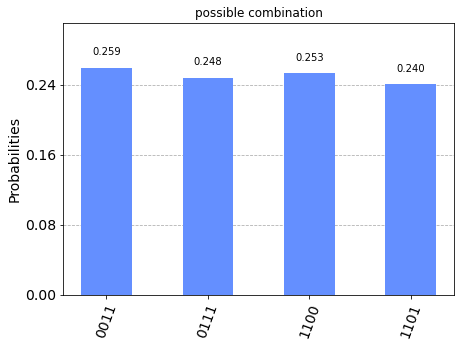

In [49]:
result=algo.run(backend)
plot_histogram(result['measurement'],title='possible combination')

In [51]:
###QSVM
#Q-ML

In [55]:
import qiskit
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer#basic aer simulator
from qiskit.aqua import QuantumInstance#experiment
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

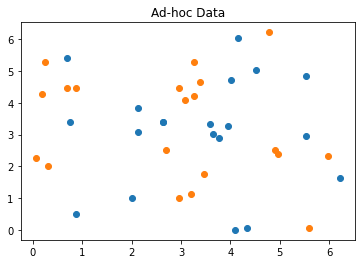

{'A': 0, 'B': 1}


In [58]:
feature_dim=2
train_data_size=20
test_data_size=10
random_seed=10598
shot=10000

sample_total,train_input,test_input,class_labels=ad_hoc_data(training_size=train_data_size,test_size=test_data_size,gap=0.3,n=feature_dim,plot_data=True)
datapoints,class_to_label=split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [60]:
backend=BasicAer.get_backend('qasm_simulator')
feature_map=ZZFeatureMap(feature_dim,reps=2)
svm=QSVM(feature_map,train_input,test_input,None)
svm.random_seed=random_seed
quantum_instance=QuantumInstance(backend,shots=shot,seed_simulator=random_seed,seed_transpiler=random_seed)
result=svm.run(quantum_instance)

kernel matrix during train


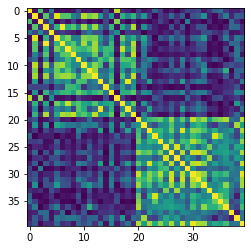

In [61]:
print('kernel matrix during train')
kernel_matrix=result['kernel_matrix_training']
img=plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper')
plt.show()

In [62]:
predicted_labels=svm.predict(datapoints[0])
predicted_classes=map_label_to_class_name(predicted_labels,svm.label_to_class)

print("ground truth: {}".format(datapoints[1]))
print("prediction: {}",format(predicted_labels))
print("success ratio: ",result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction: {} [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
success ratio:  1.0
